# Can you predict the strength of concrete?
## Portfolio project at https://zohaibdr.github.io/
## 📖 Background

Concrete is the most widely used building material in the world. It is a mix of cement and water with gravel and sand. It can also include other materials like fly ash, blast furnace slag, and additives. 

The compressive strength of concrete is a function of components and age. Using regression, we can create a model to predict its strength. 

## 💾 The data
The data of more than 1000 samples is donated by the team ([source](https://www.sciencedirect.com/science/article/abs/pii/S0008884698001653?via%3Dihub)) which will be used here:

#### Compressive strength data:
- "cement" - Portland cement in kg/m3
- "slag" - Blast furnace slag in kg/m3
- "fly_ash" - Fly ash in kg/m3
- "water" - Water in liters/m3
- "superplasticizer" - Superplasticizer additive in kg/m3
- "coarse_aggregate" - Coarse aggregate (gravel) in kg/m3
- "fine_aggregate" - Fine aggregate (sand) in kg/m3
- "age" - Age of the sample in days
- "strength" - Concrete compressive strength in megapascals (MPa)

***Acknowledgments**: I-Cheng Yeh, "Modeling of strength of high-performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998)*.



<h2> Following steps are taken for the analysis in this notebook: </h2>
				<ul>
				  <li>Reads the data from the csv file into a Pandas dataframe</li>
				  <li>Checks for missing values and removes duplicate rows</li>
				  <li>Calculates basic statistics for each column</li>
				  <li>Plots boxplot and distribution plots for various columns</li>
				  <li>Calculates correlations among the input variables and plots a heatmap</li>
				  <li>Performs univariate analysis and histogram plots</li>
				  <li>Splits the data into training and testing sets</li>
				  <li>Scales the training data and performs a regression analysis using the OLS method</li>
				  <li>Calculates the variance inflation factor (VIF) to check for multicollinearity among the input variables </li>
				  <li>Predicts the target variable based on the model</li>
				</ul>

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import skew

%matplotlib inline


DF = pd.read_csv('concrete_data.csv')

# changing column names to shorter ones 

DF.columns=['Cement','Slag','Fly Ash','Water','Superplasticizer','Coarse Agg','Fine Agg','Age','Strength']

print(DF.head())


   Cement   Slag  Fly Ash  Water  Superplasticizer  Coarse Agg  Fine Agg  Age  \
0   540.0    0.0      0.0  162.0               2.5      1040.0     676.0   28   
1   540.0    0.0      0.0  162.0               2.5      1055.0     676.0   28   
2   332.5  142.5      0.0  228.0               0.0       932.0     594.0  270   
3   332.5  142.5      0.0  228.0               0.0       932.0     594.0  365   
4   198.6  132.4      0.0  192.0               0.0       978.4     825.5  360   

   Strength  
0     79.99  
1     61.89  
2     40.27  
3     41.05  
4     44.30  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Slag              1030 non-null   float64
 2   Fly Ash           1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   Coarse Agg        1030 non-null   float64
 6   Fine Agg          1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   Strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
***The target variable is : Strength
            Cement         Slag      Fly Ash        Water  Superplasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000       1030.000000   
mean    281.167864    73.895825    54.188350   181.567282          6.204660   
std     104.506364    86.279342    63.997004    21.3

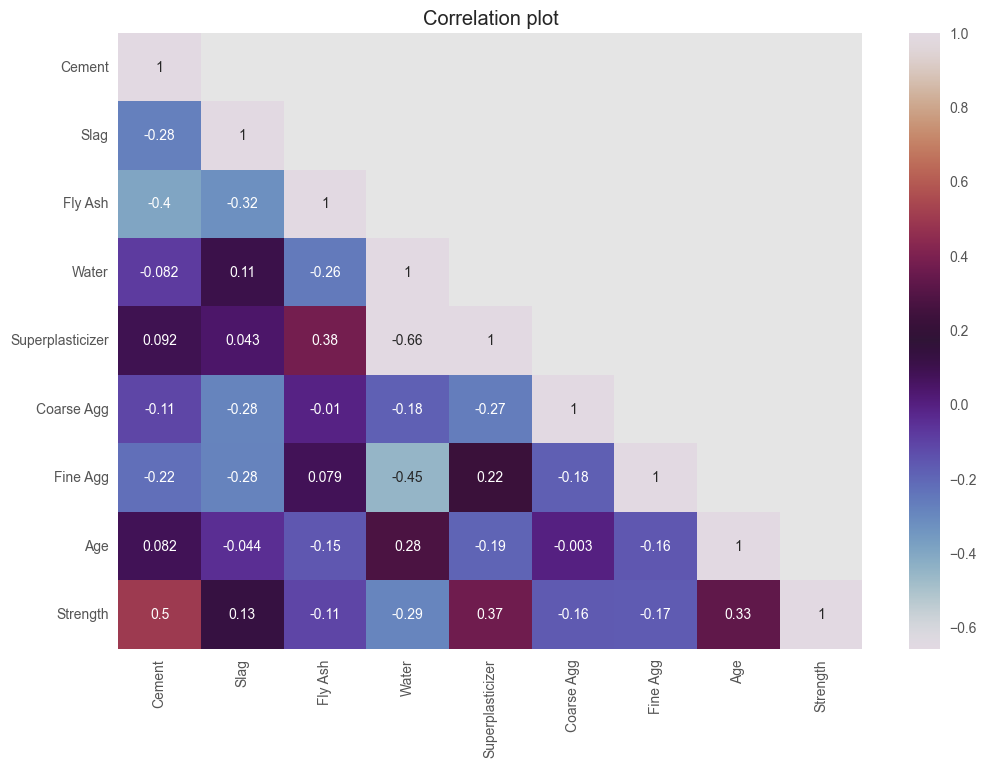

Top features correlated to Target (+ve or -ve)
+------------------+------------+
|                  |   Strength |
|------------------+------------|
| Strength         |   1        |
| Cement           |   0.497832 |
| Superplasticizer |   0.366079 |
| Age              |   0.328873 |
| Water            |  -0.289633 |
| Fine Agg         |  -0.167241 |
+------------------+------------+
BOXPLOTS, EXCLUDING CATEGORICAL FEATURES


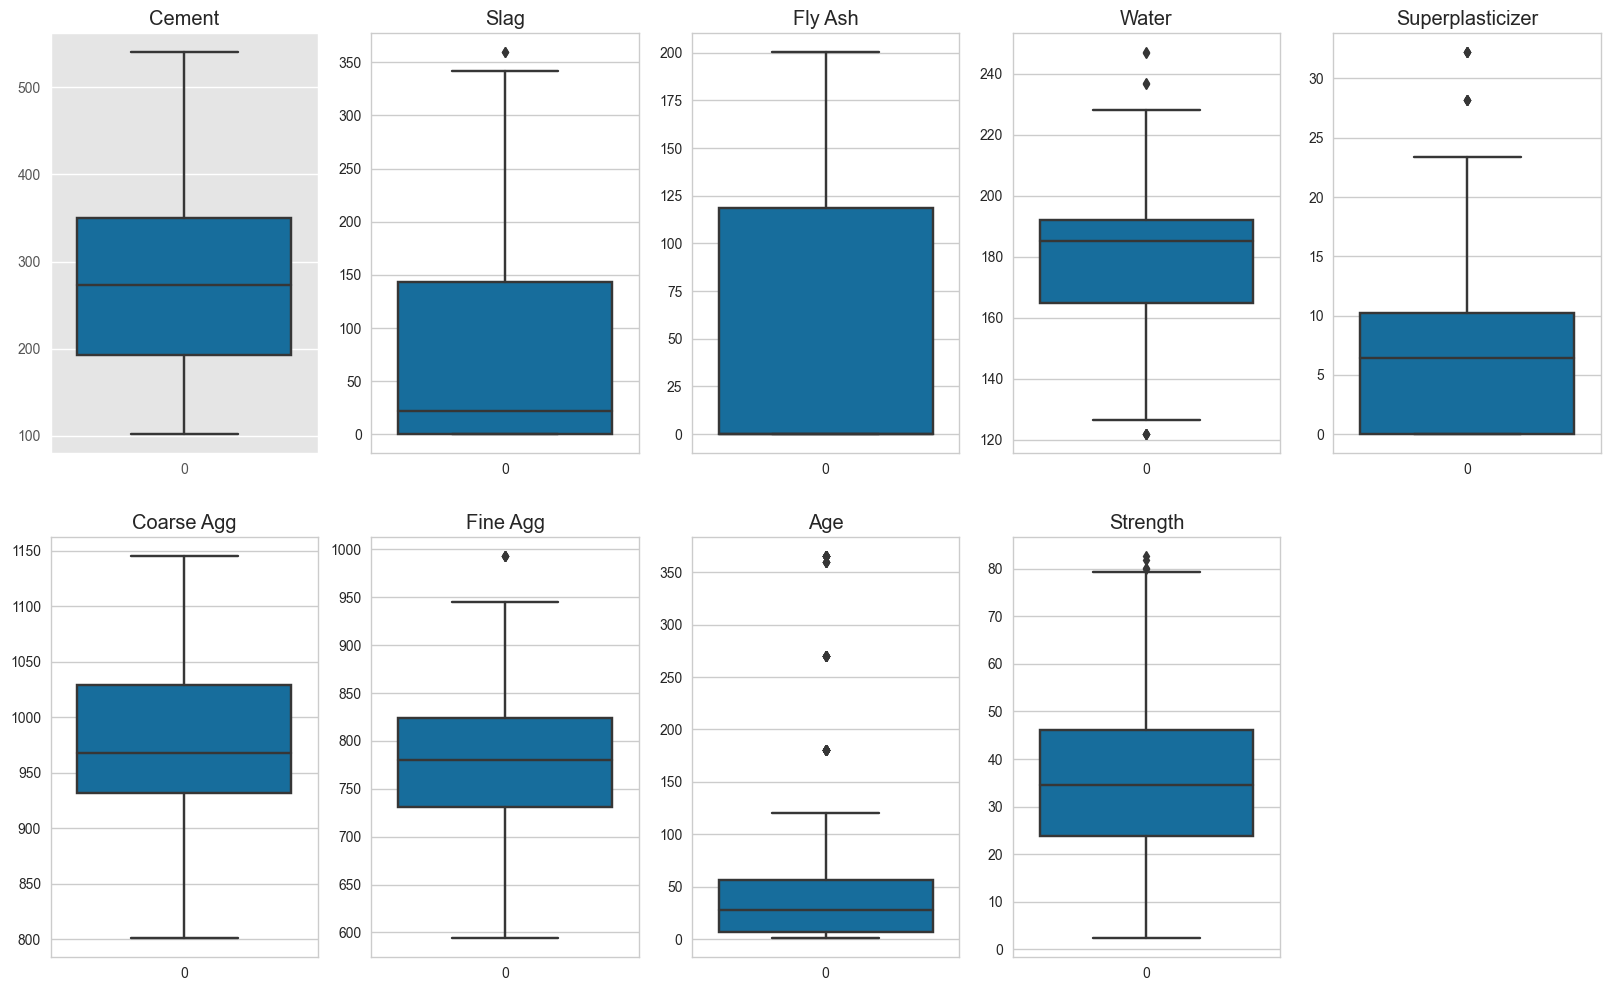

DENSITY PLOTS


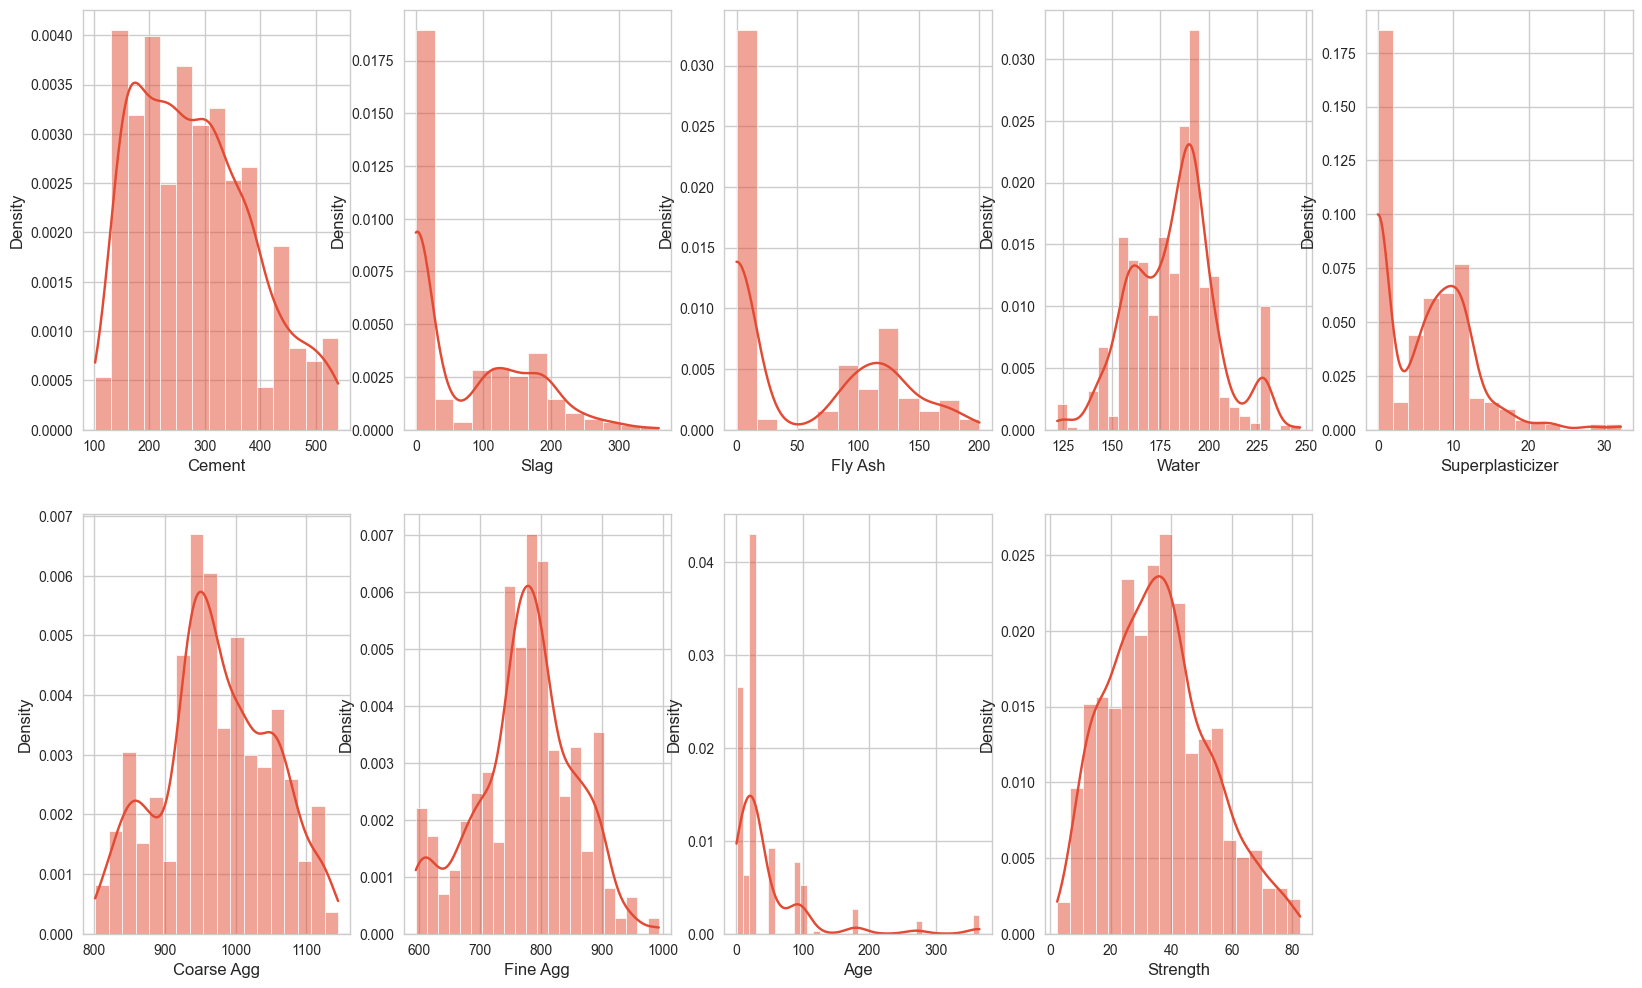

C:\Users\Zohaib\AppData\Local\Temp\ipykernel_18536\2710224785.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(data = sample_DF, x = feature, y = targetVarName, palette = 'cool')
C:\Users\Zohaib\AppData\Local\Temp\ipykernel_18536\2710224785.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(data = sample_DF, x = feature, y = targetVarName, palette = 'cool')
C:\Users\Zohaib\AppData\Local\Temp\ipykernel_18536\2710224785.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(data = sample_DF, x = feature, y = targetVarName, palette = 'cool')
C:\Users\Zohaib\AppData\Local\Temp\ipykernel_18536\2710224785.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(data = sample_DF, x = feature, y = targetVarName, palette = 'cool')
C:\Users\Zohaib\AppData\Local\Temp\ipykernel_18536\27102

SCATTER PLOTS


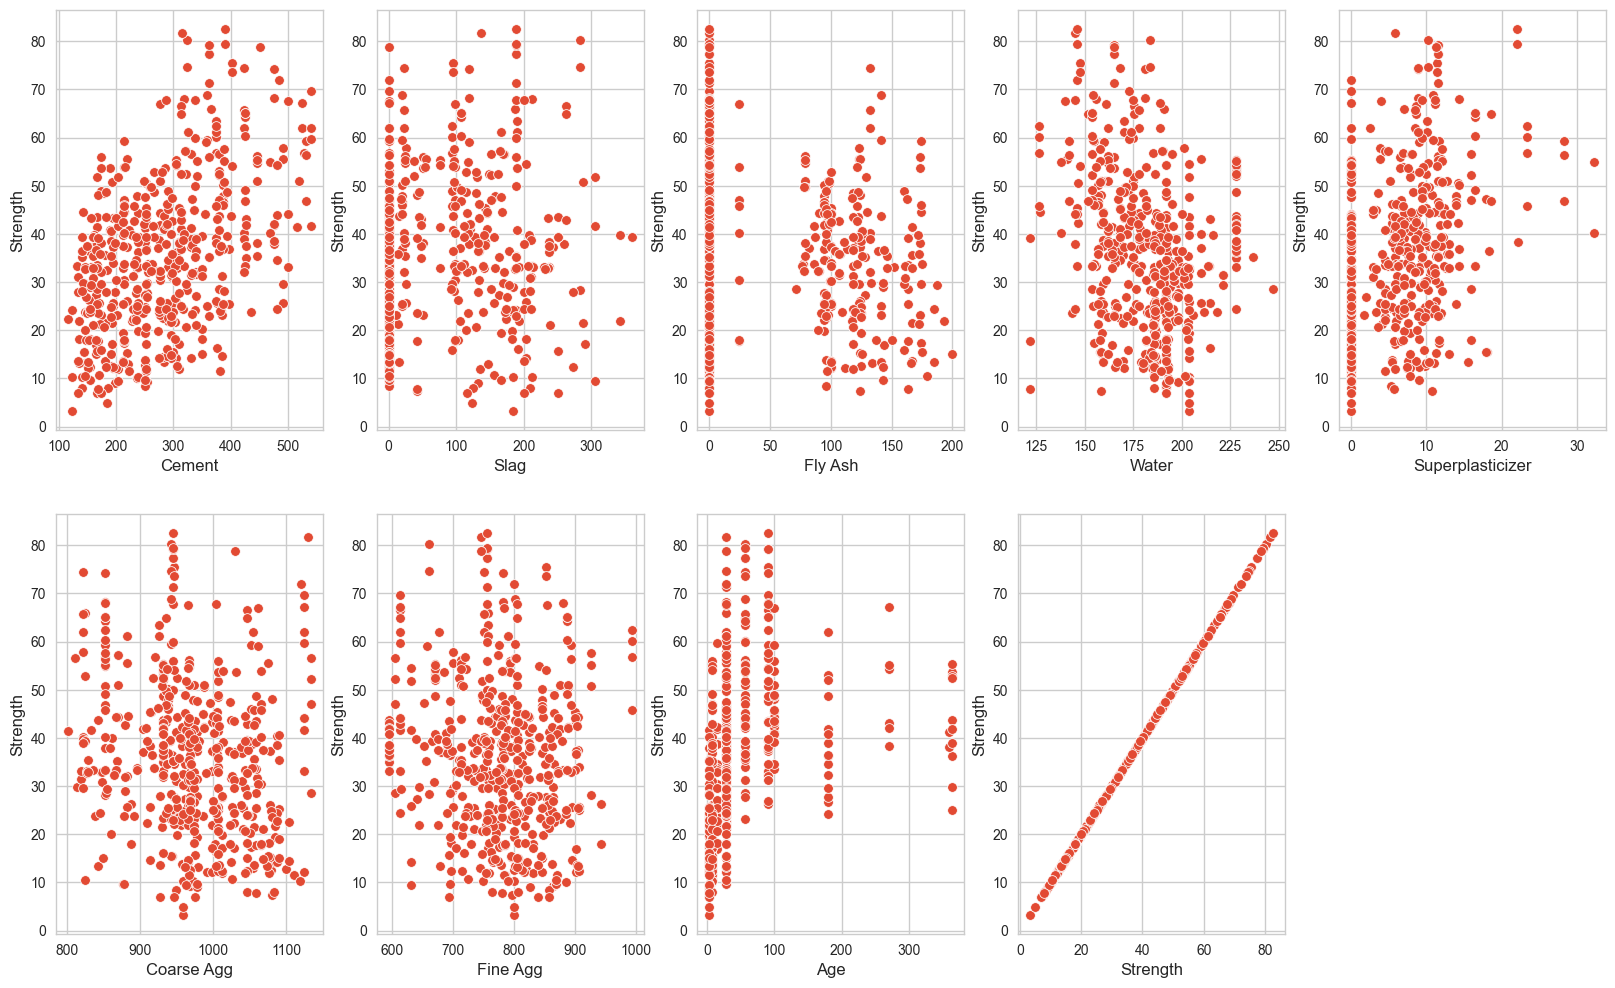

In [127]:
#EDA 
#run the github-maintained EDA script from the my github repo.
# !pip install wget 
# !pip install tabulate 

import os.path
from os import path
import wget 

if path.exists("EDAscript.ipynb"):  #if the file is already in the folder, run it, 
    %run EDAscript.ipynb
else:  # or first download from github and then run 

    url = 'https://github.com/zohaibdr/Fundamentals/blob/main/EDAscript.ipynb'
    filename = wget.download(url)
    %run EDAscript.ipynb



## Following observations are made from the above analysis
#### With the target 
- 'Cement' is the best predictor for concrete strength
- 'Superplasticizer' shows medium correlation with compressive strength.
- 'Slag', 'fly_ash' are very weak predictors so **can be omitted**
- 'Water' shows a weak negative correlation with strength. 
- 'Age' also shows medium correlation with strength but needs to be changed from continuous to startified variable
  
#### Multicollinearity 

- 'Superplasticizer' and 'fly_ash' shows some medium correlation between them.
- 'Water' and 'superplasticizer' shows strong negative correlation between them. 

#### Prior knowledge indicates that ageing has little effect on concrete strength after 90 days. Moreover, typical ageing days are 1, 7, 28 and 90 days. 

- Hence, we can bucket the 'Age' column into the above 4 intervals. This will help the algorithm learn better. 



In [128]:
DF['Age'].head()

# Convert Age into set 4 categories 
# From 0 to 7 days is Cat. 1
# From 8 to 28 days is Cat. 2
# From 29 to 90 days is Cat. 3
# Anything over 90 days is Cat. 4

# Define the bins and the labels for each bin
bins = [0, 8, 29, 91, 400] 
labels = [1, 2, 3, 4]   
DF['Age_bins'] = pd.cut(DF['Age'], bins=bins, labels=labels, right=False)


DF.head(10)

# DF.dtypes 


,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse Agg,Fine Agg,Age,Strength,Age_bins
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,2
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,2
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,4
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,4
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,4
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03,3
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70,4
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45,2
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,2
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29,2


In [118]:
# Remove weak predictors and default 'Age' column 
# Of the 'Water' and 'Superplasticizer', drop Water which has weaker correlation with Strength

DF1=DF.drop(['Slag','Fly Ash', 'Age', 'Water'],axis=1)

X = DF1.drop(['Strength'], axis = 1)
y = DF['Strength']



In [119]:
import statsmodels.api as sm
# X= add_constant(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test = train_test_split(X  , y, train_size=0.7, random_state=10 )


## Fitting a linear regression model to the data with selected variables 

In [120]:
Concrete_Model = sm.OLS(y_train,X_train).fit() # Ordinary Least Square
print(Concrete_Model.summary())

# # Lasso Regression (L1 Regularization)
# Concrete_Model = sm.OLS(y_train,X_train).fit_regularized(alpha=0, L1_wt=1) 
# print("Coefficients: \n", Concrete_Model.params)

# training predictions 
y_est_train = Concrete_Model.fittedvalues
# on the holdout set 
y_est_test = Concrete_Model.predict(X_test)

from sklearn import metrics

print("Train set accuracy is: %0.3f" %metrics.r2_score(y_train, y_est_train))
print("Test set accuracy is: %0.3f" %metrics.r2_score(y_test, y_est_test))


                                 OLS Regression Results                                
Dep. Variable:               Strength   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              2118.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):                        0.00
Time:                        16:54:57   Log-Likelihood:                         -2679.0
No. Observations:                 721   AIC:                                      5368.
Df Residuals:                     716   BIC:                                      5391.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

### Plotting the actual vs. predicted 

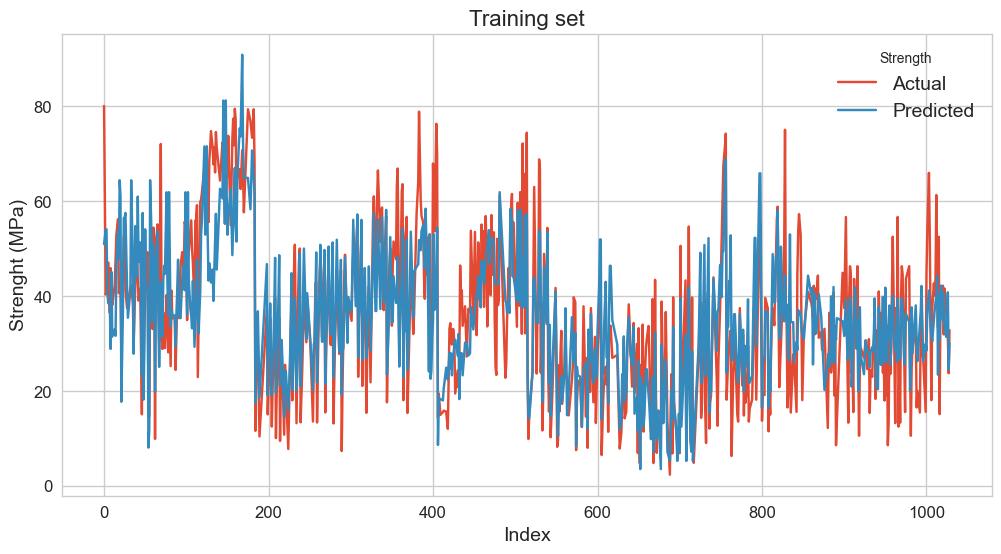

In [121]:
plt.figure(figsize = (12,6))

# sns.scatterplot(x = y_train.index, y=y_train)
sns.lineplot(x = y_train.index, y=y_train, label = "Actual")   #real and estimated KPI over time 
sns.lineplot(x = y_train.index, y=y_est_train, label = "Predicted") 

plt.legend(title='Strength', fontsize=14)
plt.xlabel('Index', fontsize=14);
plt.ylabel('Strenght (MPa)', fontsize=14);
plt.title('Training set', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)




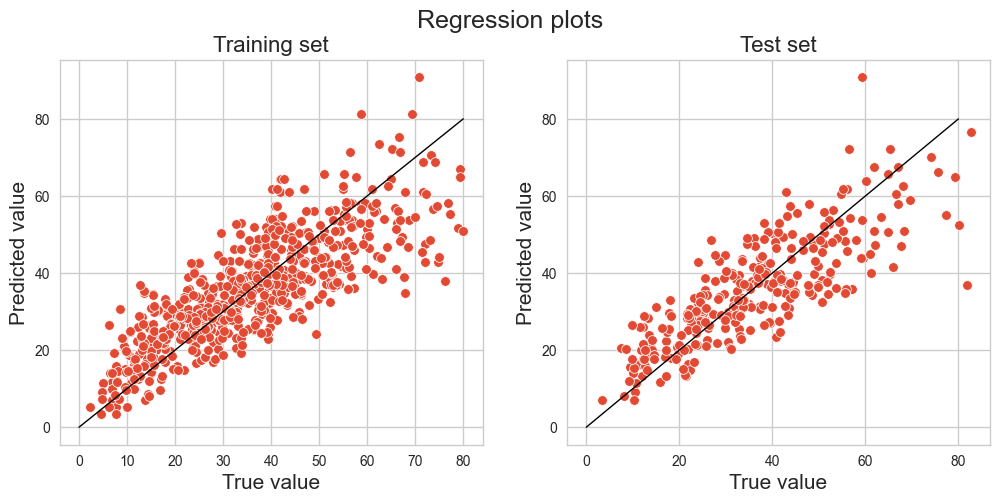

In [122]:
fig = plt.figure(figsize = (12,5))
fig.suptitle('Regression plots', fontsize=18)

plt.subplot(1,2,1)

sns.scatterplot(x=y_train, y= y_est_train)  #real vs estimated KPI 
plt.plot([0, y_train.max()], [0, y_train.max()], linewidth=1, color = 'black')  #draw a diagonal line through the data 
plt.title('Training set', fontsize=16)
plt.xlabel('True value', fontsize=15)
plt.ylabel('Predicted value', fontsize=15)

plt.subplot(1,2,2)

sns.scatterplot(x=y_test, y= y_est_test)  #real vs estimated KPI 
plt.plot([0, y_train.max()], [0, y_train.max()], linewidth=1, color = 'black')  #draw a diagonal line through the data 
plt.title('Test set', fontsize=16)
plt.xlabel('True value', fontsize=15)
plt.ylabel('Predicted value', fontsize=15)

plt.show()




The RMSE is: 9.48 MPa


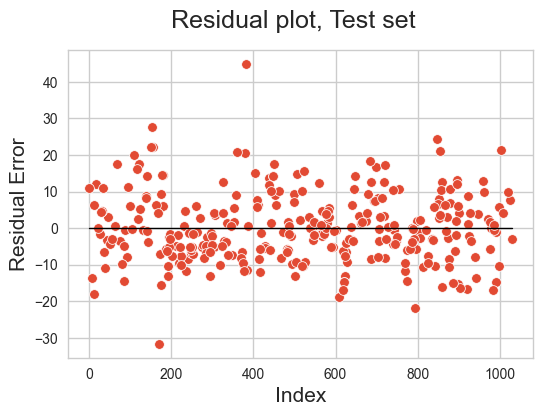

In [123]:
# Residual plot
# Test residual 
residual_test = y_test - y_est_test

fig = plt.figure(figsize = (6,4))
fig.suptitle('Residual plot, Test set', fontsize=18)

sns.scatterplot(x=y_test.index, y= residual_test)  #real vs estimated KPI 
plt.plot([0, y_test.index.max()], [0, 0], linewidth=1, color = 'black')  #draw a diagonal line through the data 
plt.xlabel('Index', fontsize=15)
plt.ylabel('Residual Error', fontsize=15)

print('The RMSE is: %0.2f' %sm.tools.eval_measures.rmse(y_test,y_est_test), 'MPa')


In [129]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif["features"] = X.columns

# print(vif)


In [125]:
# ONE HOT ENCODING CODE FOR AGE
# DONT USE, IT WILL RESULT IN LARGE MULTICOLLINEARITY 

# # Next, for linear regression, the categorical var should be binary (0 or 1). 
# # For this, we use one hot encoding 
# from sklearn.preprocessing import OneHotEncoder
# onehot_encoder = OneHotEncoder(sparse=False)

# onehot_encoded = onehot_encoder.fit_transform(DF[['Age_bins']])

# Age_cols =  ['Age1','Age2','Age3','Age4']
# AgesOneHot = pd.DataFrame(onehot_encoded, columns=Age_cols).astype('int')

# #append with original DF
# DF = pd.concat([DF, AgesOneHot], axis = 1) 
